In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
url = "/Users/prasanna/Documents/GitHub/Principles-of-DataScience/DataProcessing_Assignment-3/RawData/diabetes.csv"

In [5]:
data = pd.read_csv(url)

In [6]:
np.random.seed(42)

In [9]:
sample = data.sample(25)

In [10]:
sample.to_csv("/Users/prasanna/Documents/GitHub/Principles-of-DataScience/DataProcessing_Assignment-3/CleanData/SampleData.csv", index=False)

In [11]:
sample_mean_glucose = sample['Glucose'].mean()

In [13]:
sample_highest_glucose = sample['Glucose'].max()

In [14]:
population_mean_glucose = data['Glucose'].mean()

In [15]:
population_highest_glucose = data['Glucose'].max()

In [16]:
variables = ['Mean Glucose', 'Highest Glucose']

In [17]:
sample_values = [sample_mean_glucose, sample_highest_glucose]

In [18]:
population_values = [population_mean_glucose, population_highest_glucose]

In [19]:
x_values = np.arange(len(variables))

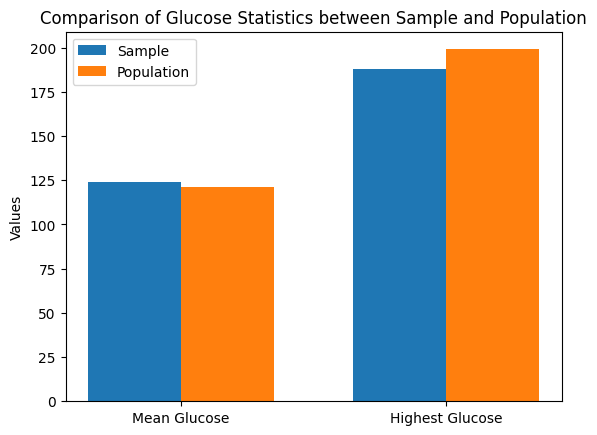

In [30]:
fig, ax = plt.subplots()
bar_width = 0.35
bar1 = ax.bar(x_values, sample_values, bar_width, label='Sample')
bar2 = ax.bar(x_values + bar_width, population_values, bar_width, label='Population')

ax.set_xticks(x_values + bar_width / 2)
ax.set_xticklabels(variables)
ax.set_ylabel('Values')
ax.set_title('Comparison of Glucose Statistics between Sample and Population')
ax.legend()

plt.show()

In [68]:
import pandas as pd

In [69]:
import numpy as np

In [70]:
import matplotlib.pyplot as plt

In [71]:
url = "/Users/prasanna/Documents/GitHub/Principles-of-DataScience/DataProcessing_Assignment-3/CleanData/SampleData.csv"

In [72]:
sample = pd.read_csv(url)

In [73]:
np.random.seed(42)

In [74]:
sample_percentile_bmi = np.percentile(sample['BMI'], 98)

In [75]:
population_percentile_bmi = np.percentile(data['BMI'], 98)

In [76]:
variables = ['98th Percentile BMI']

In [77]:
sample_values = [sample_percentile_bmi]

In [78]:
population_values = [population_percentile_bmi]

In [79]:
x_values = np.arange(len(variables))

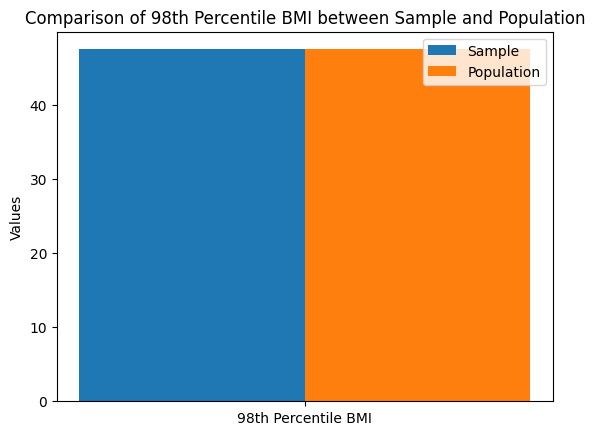

In [80]:
fig, ax = plt.subplots()
bar_width = 0.35
bar1 = ax.bar(x_values, sample_values, bar_width, label='Sample')
bar2 = ax.bar(x_values + bar_width, population_values, bar_width, label='Population')

ax.set_xticks(x_values + bar_width / 2)
ax.set_xticklabels(variables)
ax.set_ylabel('Values')
ax.set_title('Comparison of 98th Percentile BMI between Sample and Population')
ax.legend()

plt.show()

In [45]:
import pandas as pd

In [46]:
import numpy as np

In [47]:
import matplotlib.pyplot as plt

In [67]:
url = "/Users/prasanna/Documents/GitHub/Principles-of-DataScience/DataProcessing_Assignment-3/RawData/diabetes.csv"

In [65]:
data = pd.read_csv(url)

In [66]:
np.random.seed(42)

In [82]:
sample = pd.read_csv("/Users/prasanna/Documents/GitHub/Principles-of-DataScience/DataProcessing_Assignment-3/CleanData/SampleData.csv")

In [83]:
bootstrap_samples = [data['BloodPressure'].sample(150, replace=True) for _ in range(500)]

In [84]:
bootstrap_means = [sample.mean() for sample in bootstrap_samples]


In [85]:
bootstrap_std_devs = [sample.std() for sample in bootstrap_samples]

In [86]:
bootstrap_percentiles = [np.percentile(sample, 95) for sample in bootstrap_samples]

In [87]:
population_mean_blood_pressure = data['BloodPressure'].mean()

In [88]:
population_std_dev_blood_pressure = data['BloodPressure'].std()

In [89]:
population_percentile_blood_pressure = np.percentile(data['BloodPressure'], 95)

In [90]:
variables = ['Mean ', 'Standard Deviation       ', '95th Percentile ']

In [91]:
x_values = np.arange(len(variables))

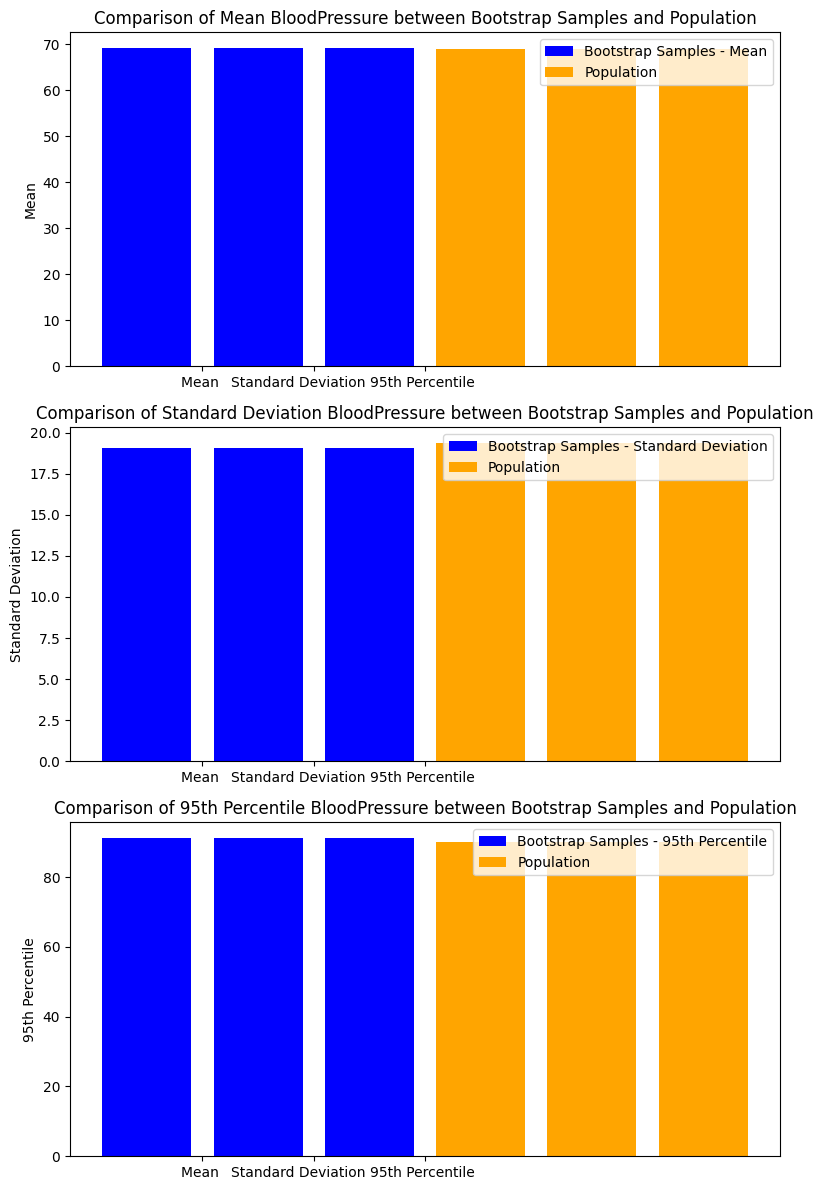

In [94]:
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Bar chart for Mean
axs[0].bar(x_values, [np.mean(bootstrap_means)], label='Bootstrap Samples - Mean', color='blue')
axs[0].bar(x_values + len(variables), [population_mean_blood_pressure], label='Population', color='orange')
axs[0].set_xticks(x_values + 0.5)
axs[0].set_xticklabels(variables)
axs[0].set_ylabel('Mean')
axs[0].legend()
axs[0].set_title('Comparison of Mean BloodPressure between Bootstrap Samples and Population')

# Bar chart for Standard Deviation
axs[1].bar(x_values, [np.mean(bootstrap_std_devs)], label='Bootstrap Samples - Standard Deviation', color='blue')
axs[1].bar(x_values + len(variables), [population_std_dev_blood_pressure], label='Population', color='orange')
axs[1].set_xticks(x_values + 0.5)
axs[1].set_xticklabels(variables)
axs[1].set_ylabel('Standard Deviation')
axs[1].legend()
axs[1].set_title('Comparison of Standard Deviation BloodPressure between Bootstrap Samples and Population')

# Bar chart for 95th Percentile
axs[2].bar(x_values, [np.mean(bootstrap_percentiles)], label='Bootstrap Samples - 95th Percentile', color='blue')
axs[2].bar(x_values + len(variables), [population_percentile_blood_pressure], label='Population', color='orange')
axs[2].set_xticks(x_values + 0.5)
axs[2].set_xticklabels(variables)
axs[2].set_ylabel('95th Percentile')
axs[2].legend()
axs[2].set_title('Comparison of 95th Percentile BloodPressure between Bootstrap Samples and Population')

plt.tight_layout()
plt.show()